(fin-edu:assets:bonds:risks)=
# Risks

- Inflation risk
- Interest rate fluctuations
- Reinvestment risk
- Rating, credit and defalut risks
- ...

(fin-edu:assets:bonds:risks:inflation)=
## Inflation risk

Independently from any other mechanism, a change in inflation alters the real return of constant nominal yield bonds. Just as an example, if you buy a $3\%$ nominal rate bond with expected inflation at $2\%$, you're aiming at $1\%$ real return. If average inflation grows and remains constant at $4\%$, you get a negative $-1\%$ return.

```{pdf:example} Zero-coupon bond

$10$-year $r = 3\%$ nominal net yield bond, with expected inflation at target inflation $i = i^* = 2\%$

```

In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

#> Bond features
n_years = 10
r_nominal = .03
i_exp = .02
i_sdev = .02

#> Initial price
# r = (pend/pinit)**(1/years) - 1
bond_price_end = 100.
bond_price_ini = bond_price_end / ( 1. + r_nominal )**n_years 

print(f"Final price: {bond_price_end: 6.3f}")
print(f"Initial price to get compound return r={r_nominal}: {bond_price_ini: 6.3f}")

#> Expected price index
pi_ini = 100.
pi_end = pi_ini * ( 1. + i_exp )**n_years

#> N.realizations
n_reals = 10000

Final price:  100.000
Initial price to get compound return r=0.03:  74.409


In [2]:
from functools import partial

#> Random number generator
i_rng = partial(np.random.default_rng().normal, loc=i_exp, scale=i_sdev)

#> Realizations of 1-year inflation
i_reals = i_rng(size=(n_years, n_reals))

#> Realization of price index: PI[n+1] = PI[n] * ( 1 + i[n] )
pi_reals = np.cumprod(1+i_reals, axis=0) * pi_ini




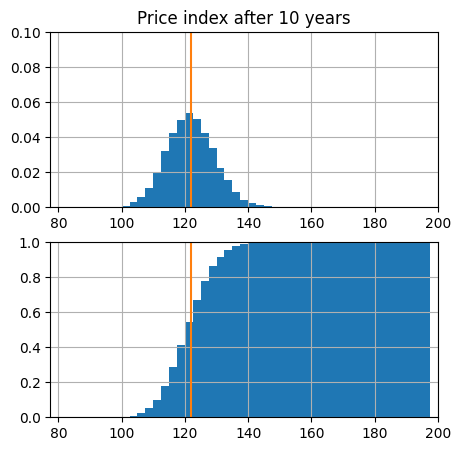

In [3]:
dbins = 2.5
bins = np.arange(80, 200, dbins)
fig, ax = plt.subplots(2,1, figsize=(5,5))
ax[0].hist(pi_reals[-1,:], bins=bins, density=True)
ax[0].plot([pi_end, pi_end], [0.,1.])
ax[1].hist(pi_reals[-1,:], bins=bins, density=True, cumulative=True)
ax[1].plot([pi_end, pi_end], [0.,1.])
ax[0].set_xlim(bins[0]-dbins, bins[-1]+dbins)
ax[1].set_xlim(bins[0]-dbins, bins[-1]+dbins)
ax[0].set_ylim(0., .1)
ax[1].set_ylim(0., 1.)
ax[0].set_title(f"Price index after {n_years} years")
ax[0].grid()
ax[1].grid()